### Dataset Overview

Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("Concrete Compressive Strength.csv")
raw_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
raw_data.shape

(1030, 9)

### Data Exploration

In [4]:
data = raw_data.copy()
data.columns = [col.split("(")[0].strip() for col in data.columns]
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
skew_summary = data.describe().T[["mean", "50%"]]
skew_summary

,mean,50%
Cement,281.165631,272.900000
Blast Furnace Slag,73.895485,22.000000
Fly Ash,54.187136,0.000000
Water,181.566359,185.000000
Superplasticizer,6.203112,6.350000
Coarse Aggregate,972.918592,968.000000
Fine Aggregate,773.578883,779.510000
Age,45.662136,28.000000
Concrete compressive strength,35.817836,34.442774


Based on skew_summary table, we hypothetically say that 
1. Normally distributed: **"Cement", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Concrete compressive strength"**
2. Right skewed: **"Burst Furnace Slag", "Fly Ash", "Age"**

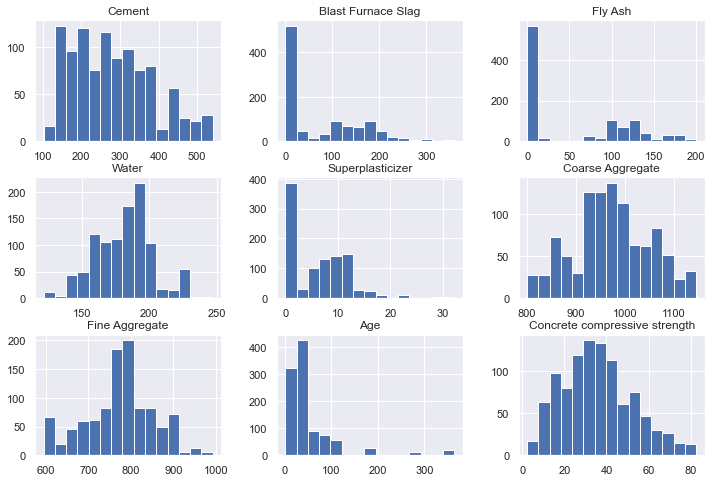

In [9]:
# Distribution of all featuers
data.hist(bins=15, figsize=(12, 8))
plt.show()

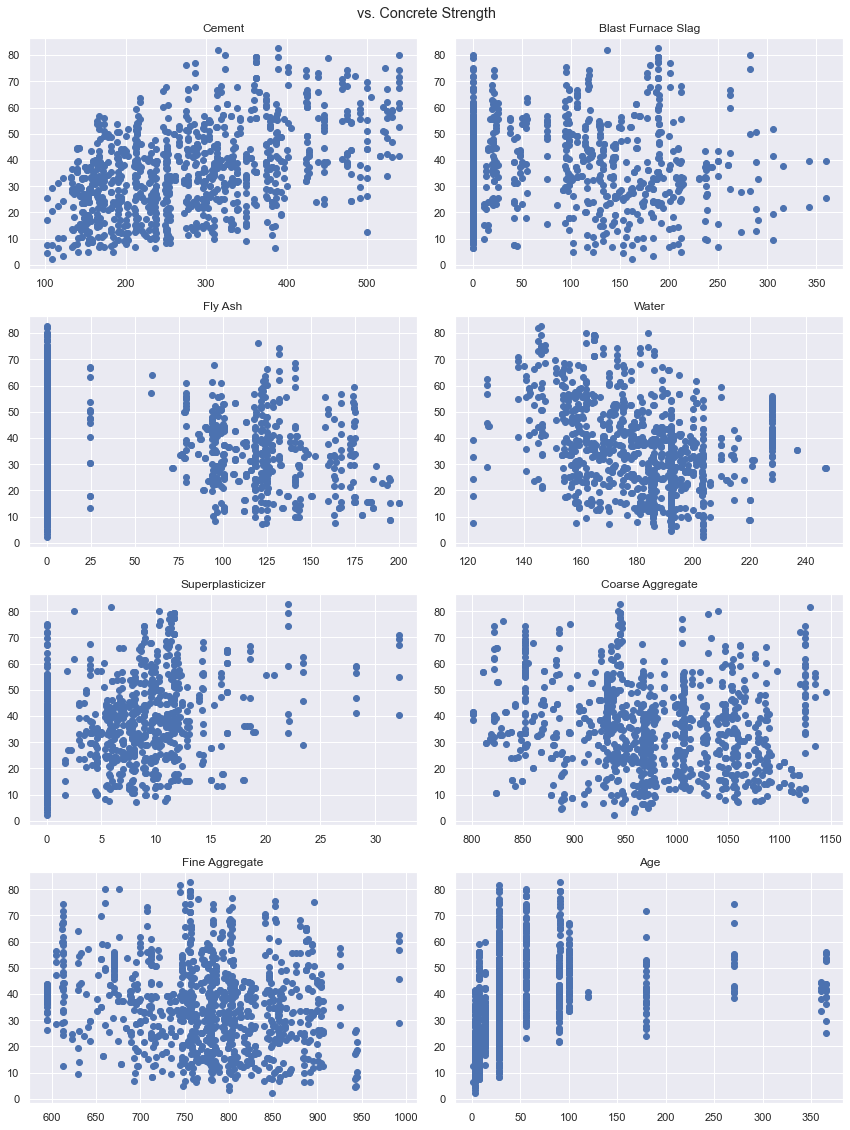

In [10]:
# Relationship of all features and concrete compressive strength
inp_features = data.columns[:-1]

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
plt.suptitle("vs. Concrete Strength")

count = 0
for i in range(4):
    for j in range(2):
        axs[i, j].scatter(data[inp_features[count]], data["Concrete compressive strength"])
        axs[i, j].set_title(inp_features[count])
        count += 1
plt.tight_layout()
plt.show()

It seems that **"age"** has curvy relationship with **"concrete compressive strength"**

<AxesSubplot:xlabel='Age', ylabel='Concrete compressive strength'>

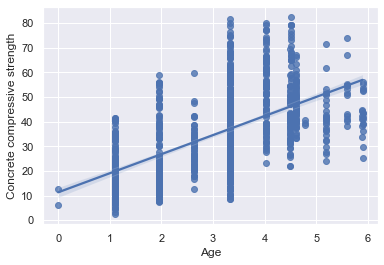

In [11]:
sns.regplot(x=np.log(data["Age"]), y=data["Concrete compressive strength"])

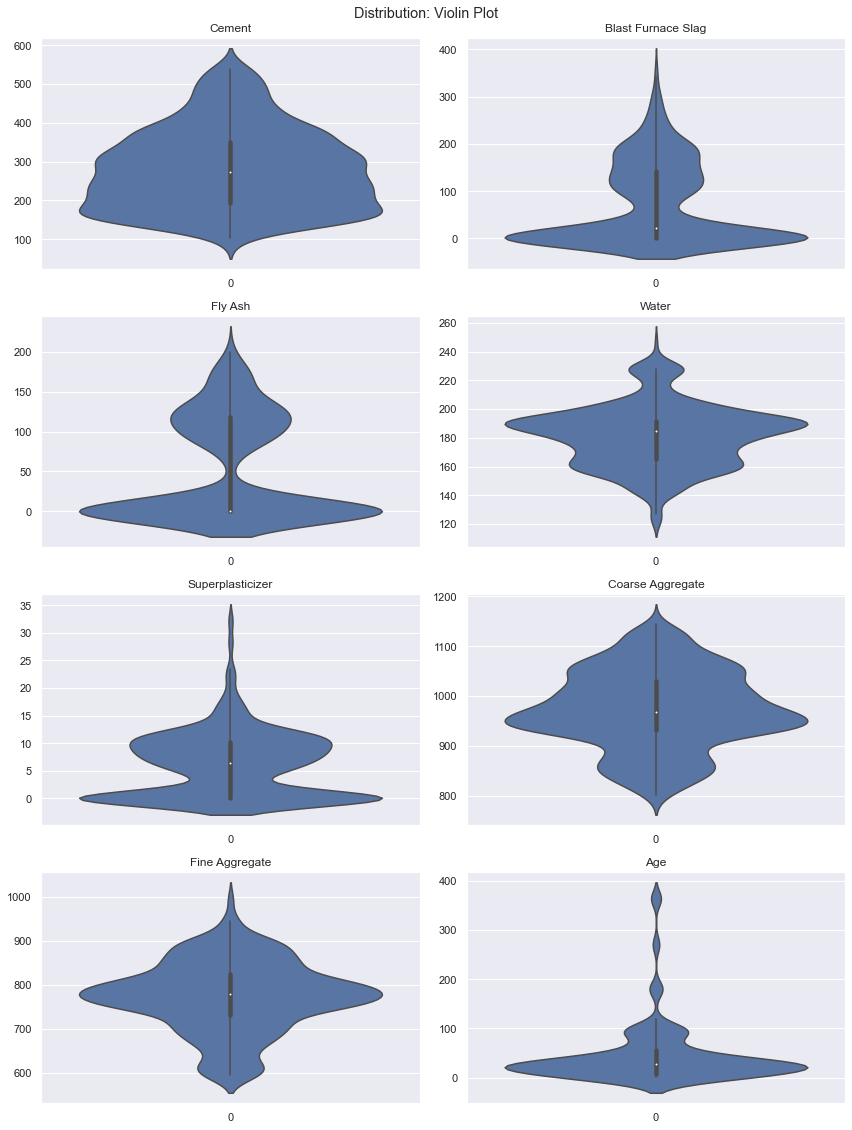

In [12]:
# Distribution of All Features
# Relationship of all features and concrete compressive strength
inp_features = data.columns[:-1]

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
plt.suptitle("Distribution: Violin Plot")

count = 0
for i in range(4):
    for j in range(2):
        sns.violinplot(data=data[inp_features[count]], ax=axs[i, j])
        axs[i, j].set_title(inp_features[count])
        count += 1
plt.tight_layout()
plt.show()

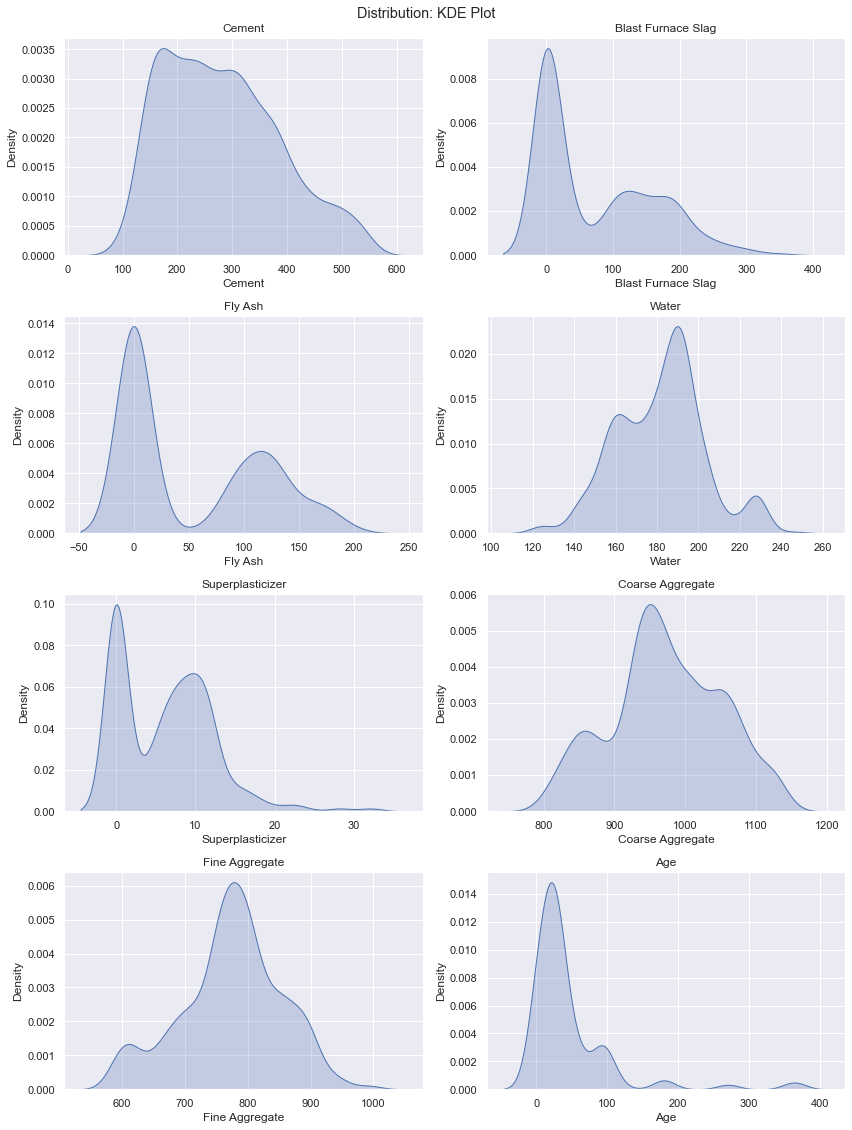

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
plt.suptitle("Distribution: KDE Plot")

count = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(data=data[inp_features[count]], fill=True, ax=axs[i, j])
        axs[i, j].set_title(inp_features[count])
        count += 1
plt.tight_layout()
plt.show()

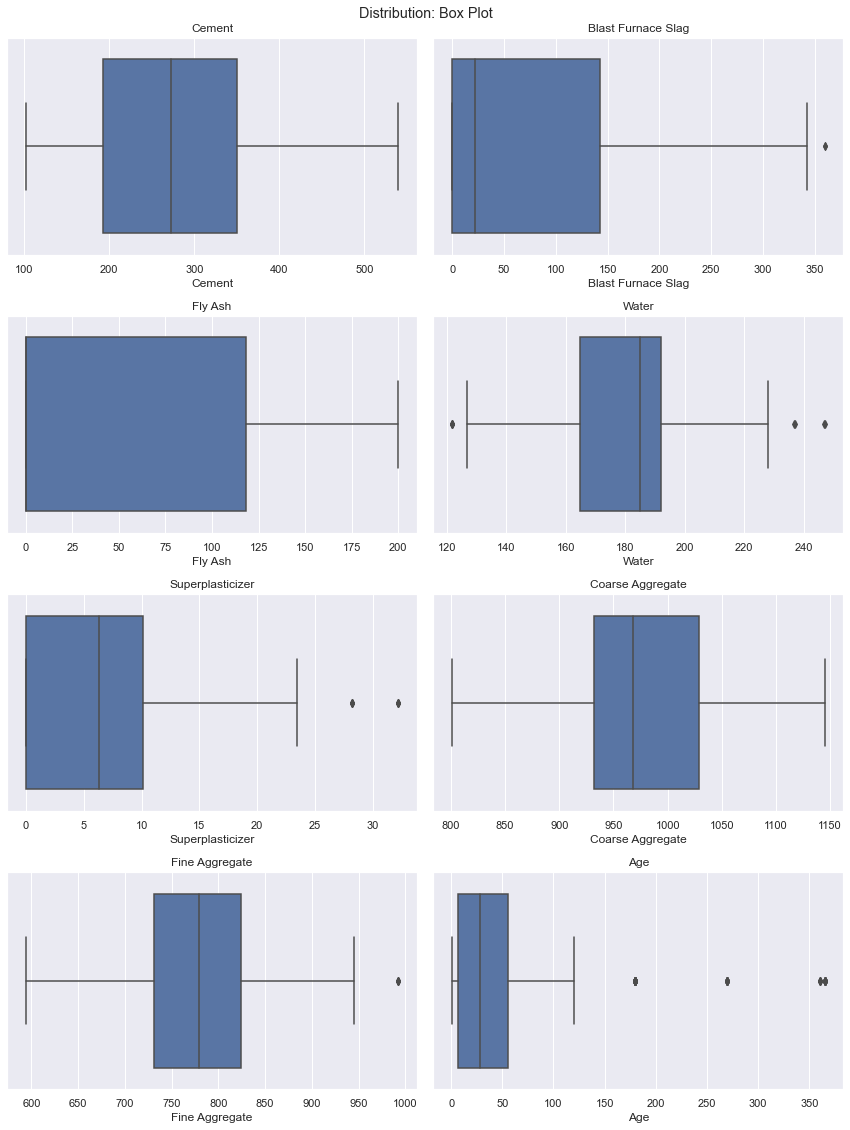

In [85]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
plt.suptitle("Distribution: Box Plot")

count = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(data[inp_features[count]], ax=axs[i, j])
        axs[i, j].set_title(inp_features[count])
        count += 1
plt.tight_layout()
plt.show()

### Feature Engineering

In [14]:
preprocessed_data = data.copy()
preprocessed_data["Age_log"] = np.log(preprocessed_data["Age"])
preprocessed_data["AggCmtRatio"] = (preprocessed_data["Coarse Aggregate"] + preprocessed_data["Fine Aggregate"]) /\
                                    preprocessed_data["Cement"]
preprocessed_data = preprocessed_data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                                       'AggCmtRatio', 'Age_log', 'Concrete compressive strength']]

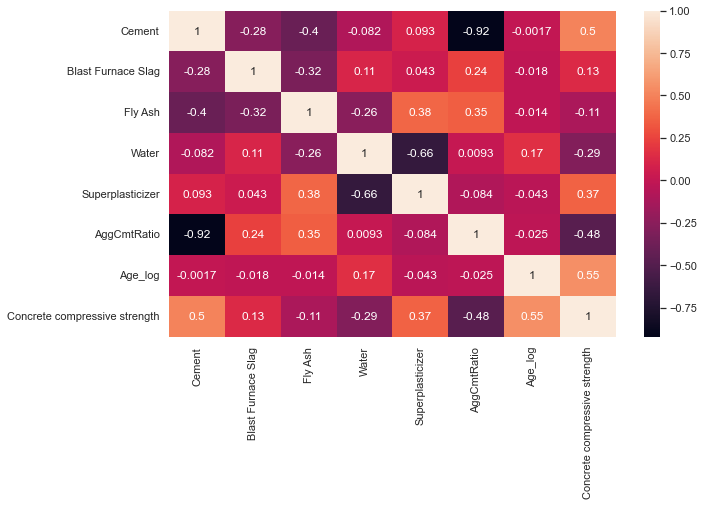

In [15]:
# Correlation Plot
plt.figure(figsize=(10, 6))
sns.heatmap(preprocessed_data.corr(), annot=True)
plt.show()

In [16]:
preprocessed_data.shape

(1030, 8)

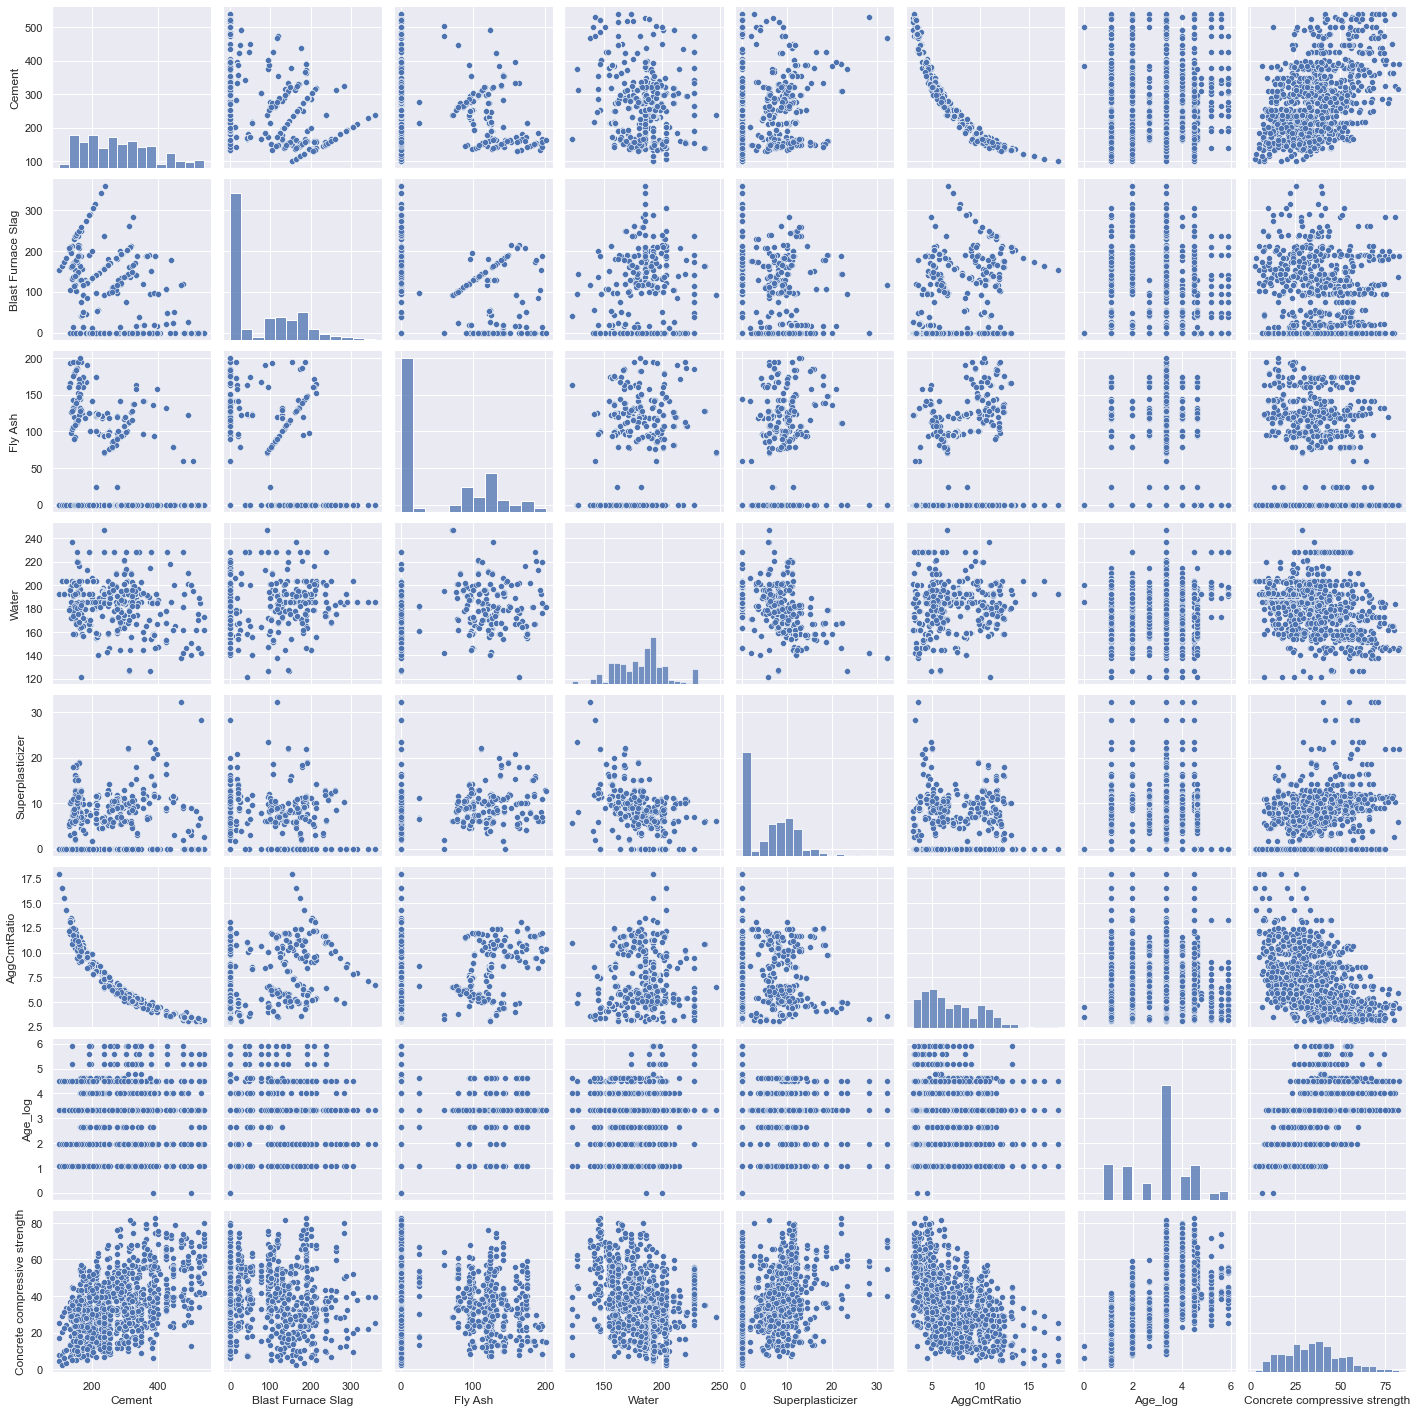

In [17]:
sns.pairplot(preprocessed_data);

Now, we have better features, but there is a possibility to face a multicollinearity problem. So, we will check them by using **feature selection or check model's perfomance based on amount of features**.

### Model Building

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

X = preprocessed_data.drop("Concrete compressive strength", axis=1)
Y = preprocessed_data["Concrete compressive strength"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_new = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)

# Select 5 Best Features
top_5_features = SelectKBest(f_regression, k=5)
top_5_features.fit(X_new, Y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x000001E0DD9F55E0>)

In [19]:
# Use 5 best features
top_5_columns = [X_train.columns[i] for i in range(X_train.shape[1]) if top_5_features.get_support()[i]]
X_new = X_new[top_5_columns]
X_new.head()

,Cement,Water,Superplasticizer,AggCmtRatio,Age_log
0,-0.828635,-0.765446,0.224201,0.897051,0.111308
1,0.374843,0.103778,-1.013764,-0.505025,-1.067097
2,0.317587,-1.234582,1.352934,-0.588131,-1.787334
3,0.688826,-1.314978,0.791878,-0.784184,-1.787334
4,-1.130428,-0.132681,2.130800,0.871373,0.111308


### Feature Selection

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [("Linear Regression", LinearRegression()), 
          ("Support Vector Machine", SVR()), 
          ("K-Nearest Neighbors", KNeighborsRegressor()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor())
         ]
fold_5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Using X_train (preprocessed_data)
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X_train, Y_train, scoring="r2", cv=fold_5).mean()
    names.append(name)
    scores.append(score)

In [21]:
model_summary1 = pd.DataFrame(data={"model": names, "r_squared": scores})
model_summary1

,model,r_squared
0,Linear Regression,0.809959
1,Support Vector Machine,0.385982
2,K-Nearest Neighbors,0.567782
3,Random Forest,0.890099
4,XGBoost,0.897013


In [22]:
models = [("Linear Regression", LinearRegression()), 
          ("Support Vector Machine", SVR()), 
          ("K-Nearest Neighbors", KNeighborsRegressor()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor())
         ]
fold_5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Using X_new: scaled + select 5 best X_train
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X_new, Y_train, scoring="r2", cv=fold_5).mean()
    names.append(name)
    scores.append(score)

In [23]:
model_summary2 = pd.DataFrame(data={"model": names, "r_squared": scores})
model_summary2

,model,r_squared
0,Linear Regression,0.697680
1,Support Vector Machine,0.706356
2,K-Nearest Neighbors,0.799420
3,Random Forest,0.832709
4,XGBoost,0.854738


In [24]:
# Use "data", not "preprocessed_data"
X = data.drop("Concrete compressive strength", axis=1)
Y = data["Concrete compressive strength"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

models = [("Linear Regression", LinearRegression()), 
          ("Support Vector Machine", SVR()), 
          ("K-Nearest Neighbors", KNeighborsRegressor()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor())
         ]
fold_5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Using X_train (data)
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X_new, Y_train, scoring="r2", cv=fold_5).mean()
    names.append(name)
    scores.append(score)

In [25]:
model_summary3 = pd.DataFrame(data={"model": names, "r_squared": scores})
model_summary3

,model,r_squared
0,Linear Regression,0.697680
1,Support Vector Machine,0.706356
2,K-Nearest Neighbors,0.799420
3,Random Forest,0.831283
4,XGBoost,0.854738


In [29]:
model_summary = model_summary1.merge(model_summary2, on="model")
model_summary = model_summary.merge(model_summary3, on="model")
model_summary

,model,r_squared_x,r_squared_y,r_squared
0,Linear Regression,0.809959,0.697680,0.697680
1,Support Vector Machine,0.385982,0.706356,0.706356
2,K-Nearest Neighbors,0.567782,0.799420,0.799420
3,Random Forest,0.890099,0.832709,0.831283
4,XGBoost,0.897013,0.854738,0.854738


On this table, we will assume that resuming our progress on **"preprocessed_data"** without passing **SelectKBest and StandardScaler**. Finally, we will choose **Random Forest and XGBoost** algorithm, since their model is robust among three datasets type.

In [44]:
X = preprocessed_data.drop("Concrete compressive strength", axis=1)
Y = preprocessed_data["Concrete compressive strength"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Hyperparameter Tuning: Random Forest

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
params = {
    "n_estimators": (100, 1000, 2000),
    "criterion": ("squared_mse", "friedman_mse")
}

grid_cv = GridSearchCV(rf, param_grid=params, scoring="r2", cv=fold_5)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_mse', 'friedman_mse'),
                         'n_estimators': (100, 1000, 2000)},
             scoring='r2')

In [57]:
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,1.549739,0.009142,0.066198,0.001518,friedman_mse,1000,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.899532,0.919020,0.880115,0.855297,0.912263,0.893246,0.023143,1
5,3.193367,0.037399,0.200909,0.133474,friedman_mse,2000,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.898275,0.920101,0.881656,0.853024,0.913124,0.893236,0.024057,2
3,0.158829,0.004252,0.008162,0.000207,friedman_mse,100,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.897290,0.914416,0.872052,0.852379,0.911971,0.889622,0.023953,3
0,0.020972,0.001270,0.000000,0.000000,squared_mse,100,"{'criterion': 'squared_mse', 'n_estimators': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.183212,0.001109,0.000000,0.000000,squared_mse,1000,"{'criterion': 'squared_mse', 'n_estimators': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.365408,0.002378,0.000000,0.000000,squared_mse,2000,"{'criterion': 'squared_mse', 'n_estimators': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [58]:
grid_cv.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 1000}

In [59]:
best_rf = RandomForestRegressor(n_estimators=1000, criterion="friedman_mse")
best_rf.fit(X_train, Y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=1000)

### Hyperparameter Tuning: XGBoost

In [66]:
xgb = XGBRegressor(random_state=42)
params = {
    "n_estimators": (100, 500, 1000, 2000),
    "learning_rate": (1e-1, 1e-3),
    "max_depth": (4, 6),
    "gamma": (0, 130)
}

grid_cv = GridSearchCV(xgb, param_grid=params, scoring="r2", cv=fold_5)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_c

In [67]:
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.166724,0.015425,0.003508,4.459279e-04,0,0.1,4,500,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.938093,0.927352,0.895006,0.876804,0.919522,0.911355,0.022354,1
2,0.367748,0.001456,0.004402,4.909373e-04,0,0.1,4,1000,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.939320,0.917141,0.893498,0.875682,0.919886,0.909105,0.022156,2
3,0.739085,0.010456,0.005801,4.001157e-04,0,0.1,4,2000,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.940010,0.910773,0.891493,0.872857,0.918099,0.906647,0.022946,3
5,0.253889,0.004599,0.004532,6.821025e-04,0,0.1,6,500,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.938548,0.915360,0.881378,0.865814,0.913761,0.902972,0.026010,4
6,0.501930,0.005857,0.005202,4.001214e-04,0,0.1,6,1000,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.938817,0.913607,0.880835,0.865656,0.913806,0.902544,0.026065,5
7,0.786601,0.011661,0.006503,4.478145e-04,0,0.1,6,2000,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.938842,0.913537,0.880809,0.865703,0.913815,0.902541,0.026058,6
4,0.053210,0.000933,0.002901,4.929057e-04,0,0.1,6,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.930569,0.923672,0.880868,0.863059,0.905499,0.900733,0.025507,7
0,0.036912,0.004879,0.002801,3.996874e-04,0,0.1,4,100,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.916467,0.930098,0.878445,0.870070,0.899861,0.898988,0.022505,8
23,1.028210,0.034676,0.003201,4.002339e-04,130,0.1,6,2000,"{'gamma': 130, 'learning_rate': 0.1, 'max_dept...",0.891626,0.914991,0.857292,0.843085,0.893751,0.880149,0.026180,9
22,0.507015,0.015823,0.003204,4.038099e-04,130,0.1,6,1000,"{'gamma': 130, 'learning_rate': 0.1, 'max_dept...",0.891626,0.914991,0.857292,0.843085,0.893751,0.880149,0.026180,9


In [68]:
grid_cv.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [69]:
best_xgb = XGBRegressor(random_state=42, **grid_cv.best_params_)
best_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

### Model Evaluation

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
rf_preds = best_rf.predict(X_test)
xgb_preds = best_xgb.predict(X_test)

# Model Evaluation
mae_list = []
mse_list = []
r2_list = []

for preds in (rf_preds, xgb_preds):
    mse = mean_squared_error(Y_test, preds)
    mae = mean_absolute_error(Y_test, preds)
    r2 = r2_score(Y_test, preds)
    
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

In [74]:
# Best Model Summary
best_summary = pd.DataFrame(data={
    "model": ("Random Forest", "XGBoost"),
    "mse": mse_list,
    "mae": mae_list,
    "r_squared": r2_list
})
best_summary

,model,mse,mae,r_squared
0,Random Forest,27.304480,3.623932,0.899088
1,XGBoost,19.203141,2.847903,0.929029


In [81]:
cols = X_train.columns
values = best_xgb.feature_importances_

feature_df = pd.DataFrame(data={
    "Feature": cols,
    "Importance": values
})

In [83]:
feature_df.sort_values("Importance", ascending=False)

,Feature,Importance
5,AggCmtRatio,0.328993
6,Age_log,0.264426
1,Blast Furnace Slag,0.116000
3,Water,0.111263
4,Superplasticizer,0.088616
0,Cement,0.059217
2,Fly Ash,0.031484


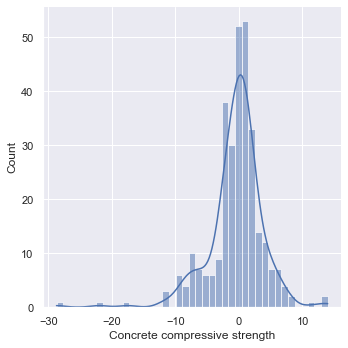

In [87]:
sns.displot(xgb_preds - Y_test, kde=True);

### Conclusion

By doing some significant feature engineering, model selection, and hyperparameter tuning, we use **XGBoost as the best model** among the others we initialized. In details, **"AggCmtRatio" and "Age_log" are the most significant features** to predict the output.

Moreover, **deleting outliers** can affect the model performance to be better by seeing our distribution plots. We can see there are a number of data which differs far away (*ex.: < -10*) based on the plot above, but in this case, we don't do it.